In [3]:
!pip install pyspark # Install the PySpark module

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark as ps # Now you can import PySpark
import json

In [2]:
# prompt: connect dataset from mydrive

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Replace 'your_file_path' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/social_media/socialmediainfluence.csv'

# Read the data into a Pandas DataFrame, specifying the encoding
df = pd.read_csv(file_path, encoding='latin-1') # Try 'latin-1' encoding. If it still fails, experiment with other encodings like 'iso-8859-1'

Mounted at /content/drive


In [ ]:
# prompt: list of column names

list(df.columns)


['Consumer ID',
 'Customer Name',
 'Age',
 'Gender',
 'Income (USD)',
 'Education Level',
 'Social Media Usage (Hours/Day)',
 'Social Media Platforms',
 'Influence Level',
 'Purchase Decision',
 'Product Category',
 'Specific Product',
 'Amount Spent (USD)',
 'Brand Name',
 'City']

In [ ]:
# prompt: separate the social media platforms with the comma and generate a list of them

# Extract the 'Social Media Platforms' column and split the values by comma
platforms_string = df['Social Media Platforms'].str.cat(sep=',')
platforms_list = platforms_string.split(',')

# Remove any leading/trailing whitespace and create a unique list
platforms_list = [platform.strip() for platform in platforms_list]
unique_platforms = list(set(platforms_list))

print(unique_platforms)


['Snapchat', 'Pinterest', 'LinkedIn', 'Twitter', 'Facebook', 'Instagram', 'TikTok']


**Influence of Social Media Platforms on Purchase Decisions by Influence Level**

<ipython-input-37-f141ec36da20>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='Count', hue='Influence Level', data=all_platform_counts, ci=None)


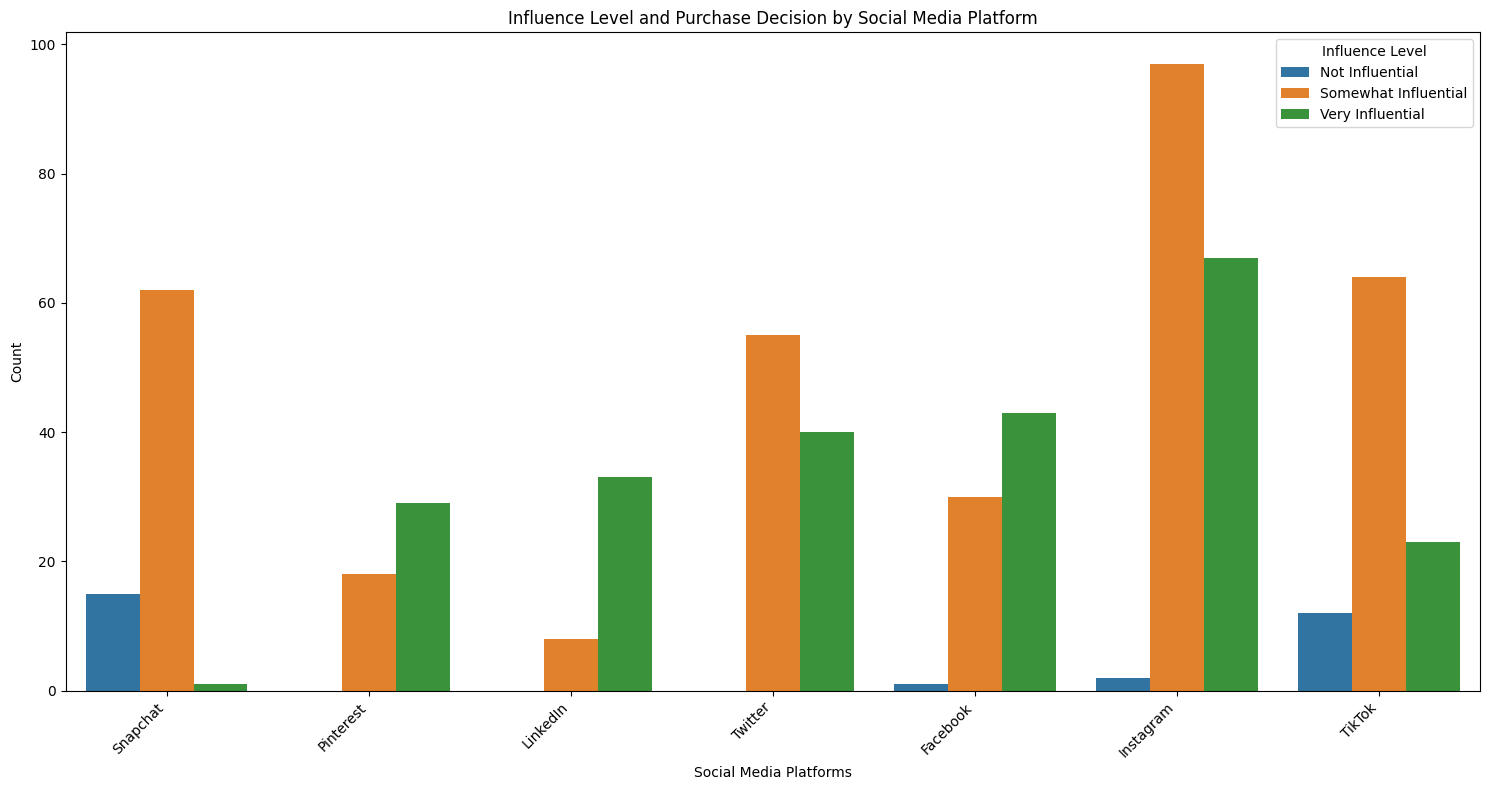

In [ ]:
# prompt: based on that list of platforms, generate a bar chart of social media platforms, influence level and purchase decision

import pandas as pd
import matplotlib.pyplot as plt
# Group the data and calculate the counts for each platform
platform_counts = []
for platform in unique_platforms:
  platform_data = df[df['Social Media Platforms'].str.contains(platform, na=False)]
  grouped_data = platform_data.groupby(['Influence Level', 'Purchase Decision']).size().reset_index(name='Count')
  grouped_data['Platform'] = platform  # Add a 'Platform' column
  platform_counts.append(grouped_data)

# Concatenate the data for all platforms
all_platform_counts = pd.concat(platform_counts)

# Create a bar chart using Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='Platform', y='Count', hue='Influence Level', data=all_platform_counts, ci=None)
plt.xticks(rotation=45, ha='right')
plt.title('Influence Level and Purchase Decision by Social Media Platform')
plt.xlabel('Social Media Platforms')
plt.ylabel('Count')
plt.legend(title='Influence Level')
plt.tight_layout()
plt.show()


**Impact of Daily Social Media Usage on Consumer Spending Across Product Categories**

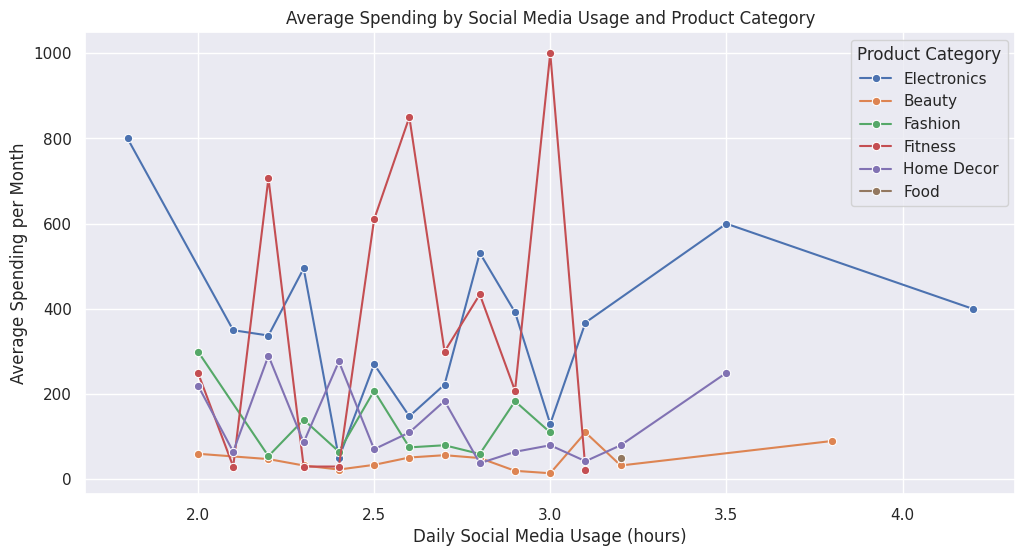

In [ ]:
# prompt: How does the duration of social media usage per day influence consumer spending across different product categories?

import matplotlib.pyplot as plt
# Group the data by 'Daily Social Media Usage (hours)' and 'Product Category' and calculate the average spending
spending_by_usage = df.groupby(['Social Media Usage (Hours/Day)', 'Product Category'])['Amount Spent (USD)'].mean().reset_index()

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Social Media Usage (Hours/Day)', y='Amount Spent (USD)', hue='Product Category', data=spending_by_usage, marker='o')
plt.title('Average Spending by Social Media Usage and Product Category')
plt.xlabel('Daily Social Media Usage (hours)')
plt.ylabel('Average Spending per Month')
plt.legend(title='Product Category')
plt.grid(True)
plt.show()


**Average Spending on Product Categories Across Social Media Platforms**

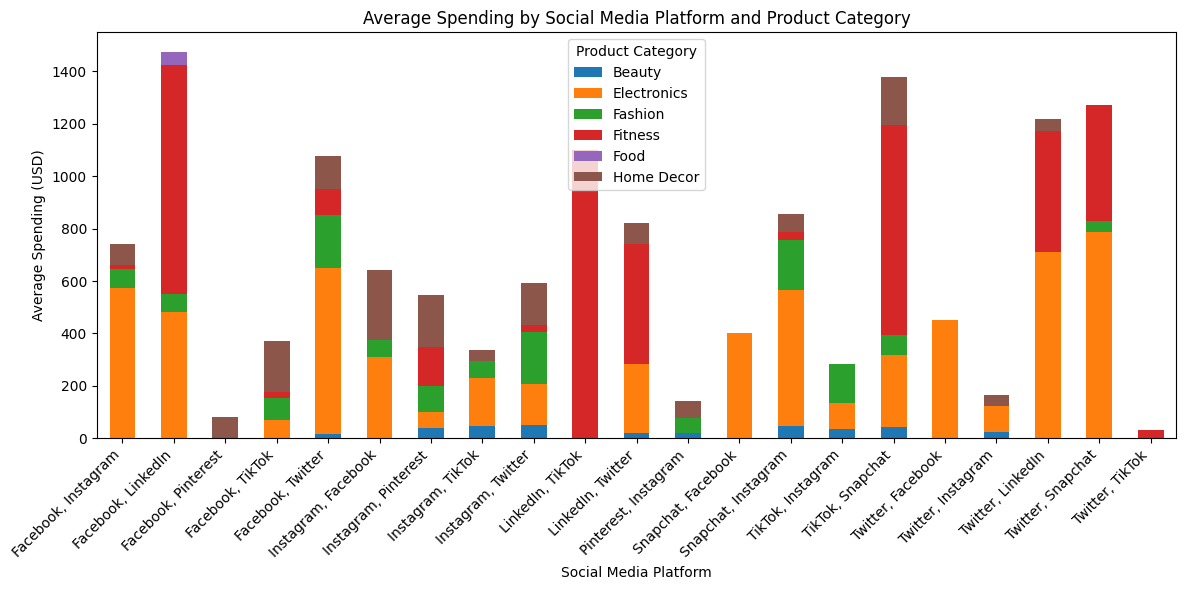

In [ ]:
# prompt: Stacked bar chart showing the average amount spent on each product category across different social media platforms

import matplotlib.pyplot as plt
# Group the data by 'Social Media Platforms' and 'Product Category' and calculate the average spending
spending_by_platform = df.groupby(['Social Media Platforms', 'Product Category'])['Amount Spent (USD)'].mean().unstack().fillna(0)

# Create a stacked bar chart
spending_by_platform.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Spending by Social Media Platform and Product Category')
plt.xlabel('Social Media Platform')
plt.ylabel('Average Spending (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


**Product Preferences by Age Group**

<ipython-input-25-d7a2c56574a5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_purchases = df.groupby(['Age Group', 'Product Category'])['Purchase Decision'].count().unstack().fillna(0)


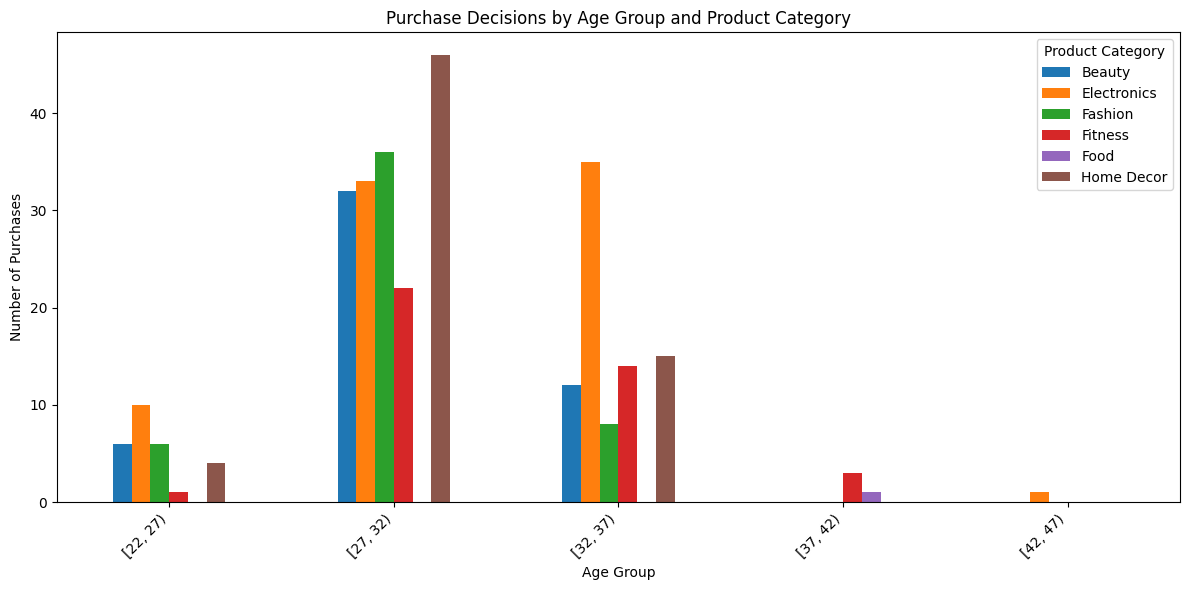

In [25]:
# prompt: Create a grouped bar chart displaying the number of purchase in each product category (e.g., fashion, beauty, lifestyle) for different age groups (group the age by 5 years difference from youngest to oldest). Each group of bars will represent an age group, and the bars within the group will represent different product categories.

import matplotlib.pyplot as plt
# Group the data by 'Age Group' and 'Product Category' and count the occurrences
age_group_purchases = df.groupby(['Age Group', 'Product Category'])['Purchase Decision'].count().unstack().fillna(0)

# Create a grouped bar chart
age_group_purchases.plot(kind='bar', figsize=(12, 6))
plt.title('Purchase Decisions by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


**Consumer Spending by Product Category Across 5-Year Age Groups**

<ipython-input-30-758791b2d1b3>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_age_group = df.groupby(['Age Group', 'Product Category'])['Amount Spent (USD)'].sum().unstack().fillna(0)


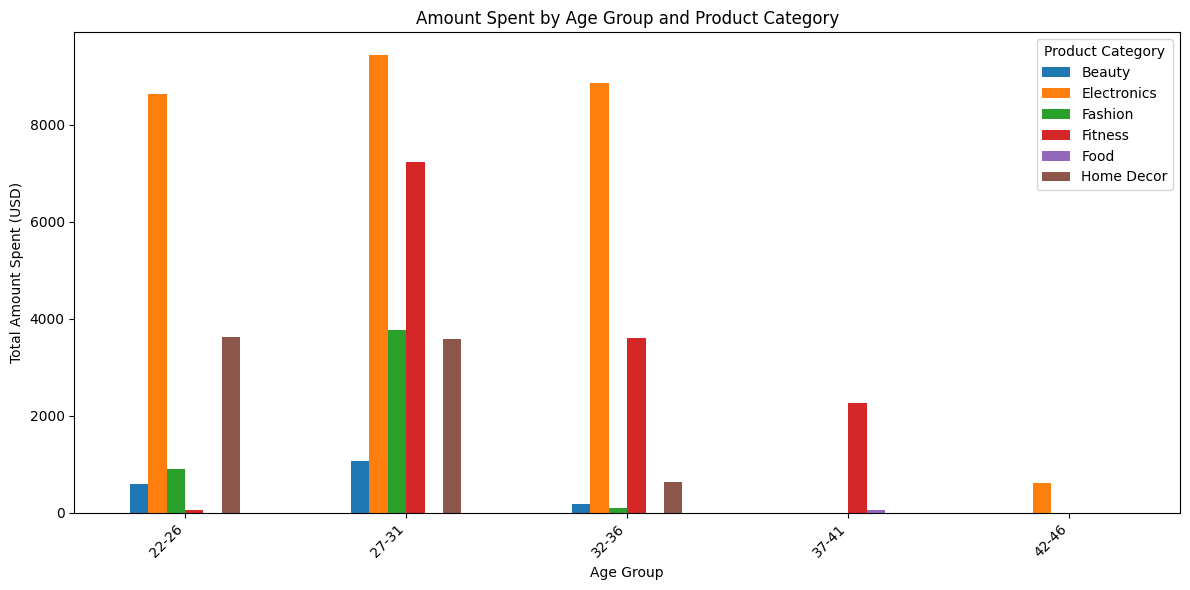

In [30]:
# prompt: Create a grouped bar chart displaying amount spent in each product category (e.g., fashion, beauty, lifestyle) for different age groups (group the age by 5 years difference from youngest to oldest). Each group of bars will represent an age group, and the bars within the group will represent different product categories.

import pandas as pd
import matplotlib.pyplot as plt
# Define age bins with a difference of 5 years
age_bins = range(df['Age'].min(), df['Age'].max() + 6, 5)

# Create a new column for age groups
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=[f"{i}-{i+4}" for i in age_bins[:-1]])

# Group the data by 'Age Group' and 'Product Category' and calculate the total amount spent
spending_by_age_group = df.groupby(['Age Group', 'Product Category'])['Amount Spent (USD)'].sum().unstack().fillna(0)

# Create a grouped bar chart
spending_by_age_group.plot(kind='bar', figsize=(12, 6))
plt.title('Amount Spent by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Amount Spent (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()
